In [1]:
from pydstarlite.utility import *
from pydstarlite.dstarlite import DStarLite
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

In [2]:
GRAPH, START, END = grid_from_string("""
#####################
A.......#.......#...#
#######.#######.#.#.#
#.#...#.#.....#...#.#
#.#.#.#.#.###.###.#.#
#...#.#.....#.#...#.#
#####.#####.#.#.###.#
#...#.....#.#.#.#...#
#.#.###.#.#.#.#.#.###
#.#.....#.#.#...#.#.#
#.#######.###.###.#.#
#...#...#.....#.....#
###.###.#######.#.###
#.#.....#.......#...#
#.###.###.#########.#
#...#.#...#.....#.#.#
###.#.#.#######.#.#.#
#...#.#...#...#.#.#.#
#.#.#####.#.#.#.#.#.#
#.#.........#...#...Z
#####################
""")

In [3]:
came_from, cost_so_far = a_star_search(GRAPH, START, END)

In [4]:
draw_grid(GRAPH, width=1, path=reconstruct_path(came_from, start=START, goal=END))

#####################
@@@@@@@@#.......#@@@#
#######@#######.#@#@#
#.#...#@#@@@@@#..@#@#
#.#.#.#@#@###@###@#@#
#...#.#@@@..#@#@@@#@#
#####.#####.#@#@###@#
#...#.....#.#@#@#@@@#
#.#.###.#.#.#@#@#@###
#.#.....#.#.#@@@#@#.#
#.#######.###.###@#.#
#...#...#.....#..@..#
###.###.#######.#@###
#.#.....#.......#@@@#
#.###.###.#########@#
#...#.#...#.....#.#@#
###.#.#.#######.#.#@#
#...#.#...#...#.#.#@#
#.#.#####.#.#.#.#.#@#
#.#.........#...#..@@
#####################


In [5]:
%pdb

Automatic pdb calling has been turned ON


In [6]:
def empty_image(graph):
    image = 0.5 * np.ones((GRAPH.width, GRAPH.height, 4))
    image[:, :, 3] = 1
    return image

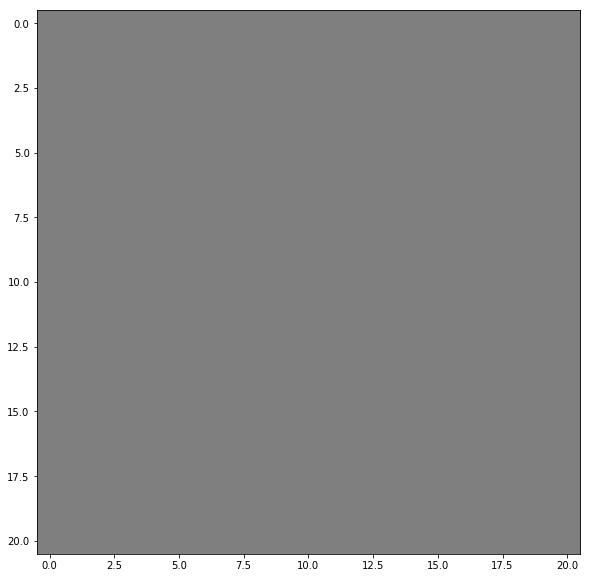

In [7]:
data = empty_image(GRAPH)
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
img = ax.imshow(data)

In [22]:
dstar = DStarLite(GRAPH, START, END, view_range=2)

In [23]:
SIMULATION = dstar.move_to_goal()

In [24]:
def init():
    img.set_data(data)
    return img,

In [25]:
def animate(args):
    (position, observation, walls) = args
    tmp = empty_image(GRAPH)
    tmp[END[1], END[0]] = [0, 0, 1, 1]

    tmp[position[1], position[0]] = [1, 0, 0, 1]
    for (x, y) in walls:
        tmp[y, x] = [0,0,0,1]
    for (x, y) in observation.keys():
        if (x, y) == position:
            continue
        else:
            (r, g, b, a) = tmp[y, x]
            tmp[y, x] = [r, g, b, 0.7]
    img.set_data(tmp)
    return img,

In [26]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=SIMULATION, interval=200, blit=True, save_count=100000)

In [27]:
# Requires ffmpeg installed - `brew install ffmpeg` on Mac
#HTML(anim.to_html5_video())

In [28]:
anim.save('pydstarlite.gif', dpi=80, writer='imagemagick')

In [30]:
!open .